# 1. Introduction

## 1.1 Imports
Import libraries here.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from kuberspatiotemporal import CompoundModel, Feature, SpatialModel, KuberModel
from kuberspatiotemporal.tools import make_ellipses

kuberspatiotemporal.spatial


In [3]:
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import FunctionTransformer

In [4]:
import matplotlib.pyplot as plt

# 2. Load Data

In [5]:
data = pd.read_json('data/spatial_data_lisboa.json')

In [6]:
data.head(2)

,id,user_id,os,dataversion,appversion,encrypted,timestamp,latitude,longitude,organization_uid,score,accuracy
0,1257521,lisboa,android,21,21,False,2019-06-07 12:12:55+00:00,38.710482,-9.139440,3,-1.0,-1
1,1257522,lisboa,android,21,21,False,2019-06-07 12:13:07+00:00,38.710491,-9.139443,3,-1.0,-1


In [7]:
# Filter office and home locations
data = data[['latitude', 'longitude', 'timestamp']]
data = data[(
    (((data['latitude']>38.710104) & (data['latitude']<38.710648)) & ((data['longitude']>-9.139794) & (data['longitude']<-9.1389)))
 | (((data['latitude']>38.725828) & (data['latitude']<38.726512)) & ((data['longitude']>-9.133944) & (data['longitude']<-9.133169))))]
data['time'] = [ts.hour + ts.minute/60 + ts.second/3600 for ts in data.timestamp]
data['weekday'] = [ts.dayofweek for ts in data.timestamp]

,latitude,longitude,timestamp,time,weekday
0,38.710482,-9.139440,2019-06-07 12:12:55+00:00,12.215278,4
1,38.710491,-9.139443,2019-06-07 12:13:07+00:00,12.218611,4
2,38.710490,-9.139442,2019-06-07 12:13:19+00:00,12.221944,4
3,38.710490,-9.139442,2019-06-07 12:28:51+00:00,12.480833,4
10,38.726250,-9.133597,2019-06-18 09:05:45+00:00,9.095833,1
...,...,...,...,...,...
8394,38.710482,-9.139465,2019-11-27 12:08:56+00:00,12.148889,2
8395,38.710482,-9.139465,2019-11-27 12:24:02+00:00,12.400556,2
8405,38.710483,-9.139454,2019-11-27 14:54:35+00:00,14.909722,2
8406,38.710483,-9.139454,2019-11-27 15:13:36+00:00,15.226667,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11d4fdbe0>]],
      dtype=object)

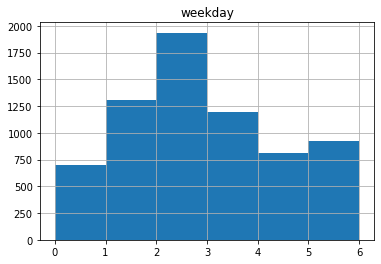

In [8]:
display(data, data.hist(column="weekday", bins=6))

# 3. Learn Weekday Model - 1D

**scaling_parameter**

The scaling parameter of the dirichlet proccess.

**min_eigval**

Important value. Minimum extend a cluster/component is allowed to have in one of its main directions. Prevents degenerated components. Read the documentation for details, defaults to `1e-2`.

In [9]:
model = KuberModel(n_symbols=7, n_components=7, loa=True)

In [10]:
model.fit(data[['weekday']].values)

Expext [[0.14037452 0.11133546 0.02943584 ... 0.17218851 0.04246732 0.2217363 ]
 [0.14037452 0.11133546 0.02943584 ... 0.17218851 0.04246732 0.2217363 ]
 [0.14037452 0.11133546 0.02943584 ... 0.17218851 0.04246732 0.2217363 ]
 ...
 [0.16978144 0.20100807 0.12025454 ... 0.21644254 0.0274958  0.22583942]
 [0.16978144 0.20100807 0.12025454 ... 0.21644254 0.0274958  0.22583942]
 [0.16978144 0.20100807 0.12025454 ... 0.21644254 0.0274958  0.22583942]]
Expext [[0.15687254 0.11707316 0.02267349 ... 0.19116546 0.06919995 0.18342593]
 [0.15687254 0.11707316 0.02267349 ... 0.19116546 0.06919995 0.18342593]
 [0.15687254 0.11707316 0.02267349 ... 0.19116546 0.06919995 0.18342593]
 ...
 [0.30264537 0.3371495  0.14775044 ... 0.38329493 0.0714665  0.29799493]
 [0.30264537 0.3371495  0.14775044 ... 0.38329493 0.0714665  0.29799493]
 [0.30264537 0.3371495  0.14775044 ... 0.38329493 0.0714665  0.29799493]]
Expext [[0.15686098 0.1170634  0.02267132 ... 0.19115225 0.06919258 0.18341808]
 [0.15686098 0.117

KuberModel(n_dim=1, n_components=7, nonparametric=True, scaling_parameter=2.0, decay=0.75, online_learning=False, n_iterations=100, score_threshold=None, random_reset=False, loa=True, _sufficient_statistics=`list of length 2, elements of shapes [(7,), (7, 7)]`, _BaseModel__priors=Array (7,), _weights=Array (7,), n_symbols=7)

In [11]:
model

KuberModel(n_dim=1, n_components=7, nonparametric=True, scaling_parameter=2.0, decay=0.75, online_learning=False, n_iterations=100, score_threshold=None, random_reset=False, loa=True, _sufficient_statistics=`list of length 2, elements of shapes [(7,), (7, 7)]`, _BaseModel__priors=Array (7,), _weights=Array (7,), n_symbols=7)

In [12]:
# weights 
# model._weights

In [13]:
model._weights

array([0.21255742, 0.34399866, 0.16468015, 0.00897492, 0.1219702 ,
       0.08847254, 0.0593461 ])

In [14]:
model.box = None

In [19]:
model.score(np.array([[2]]))

Expext [[0.30264511 0.33714594 0.14774705 0.69142143 0.38329635 0.07146409
  0.29800387]]


0.25374412502892907

In [20]:
total = 0
for i in range(0,7):
    total += model.score(np.array([[i]]))
    print(model.score(np.array([[i]])))
print(total)

Expext [[0.03899954 0.17834361 0.02397796 0.03102119 0.00949288 0.2687511
  0.05561739]]
Expext [[0.03899954 0.17834361 0.02397796 0.03102119 0.00949288 0.2687511
  0.05561739]]
0.09913575682360942
Expext [[2.03011801e-01 1.75988196e-01 3.47543703e-01 1.51618026e-02
  1.33426486e-06 1.27868476e-01 2.91738871e-01]]
Expext [[2.03011801e-01 1.75988196e-01 3.47543703e-01 1.51618026e-02
  1.33426486e-06 1.27868476e-01 2.91738871e-01]]
0.17673370662750176
Expext [[0.30264511 0.33714594 0.14774705 0.69142143 0.38329635 0.07146409
  0.29800387]]
Expext [[0.30264511 0.33714594 0.14774705 0.69142143 0.38329635 0.07146409
  0.29800387]]
0.25374412502892907
Expext [[0.11017126 0.14367882 0.39901111 0.1401116  0.12991152 0.17771421
  0.04816328]]
Expext [[0.11017126 0.14367882 0.39901111 0.1401116  0.12991152 0.17771421
  0.04816328]]
0.16330277294600326
Expext [[0.15686098 0.1170634  0.02267132 0.001725   0.19115225 0.06919258
  0.18341808]]
Expext [[0.15686098 0.1170634  0.02267132 0.001725   0.1

In [69]:
total

0.9537094227788704

# 4. Learn Time Model - 1D

In [72]:
limits = np.array([data.time.min(), data.time.max()])

In [73]:
limits

array([1.27777778e-02, 2.39988889e+01])

In [82]:
model = SpatialModel(n_dim=1, min_eigval=1e-2, nonparametric=True, n_iterations=200, limits=limits,
                    scaling_parameter=100, loa=True, decay=5)

In [83]:
model.fit(data[['time']].values)

SpatialModel(n_dim=1, n_components=100, nonparametric=True, scaling_parameter=100, decay=5, online_learning=False, n_iterations=200, score_threshold=None, random_reset=False, loa=True, _sufficient_statistics=`list of length 3, elements of shapes [(100,), (100, 1), (100, 1, 1)]`, _BaseModel__priors=Array (100,), _weights=Array (100,), limits=array([1.27777778e-02, 2.39988889e+01]), min_eigval=0.01, box=None, _SpatialModel__means=Array (100, 1), _SpatialModel__covs=Array (100, 1, 1))

In [84]:
model

SpatialModel(n_dim=1, n_components=100, nonparametric=True, scaling_parameter=100, decay=5, online_learning=False, n_iterations=200, score_threshold=None, random_reset=False, loa=True, _sufficient_statistics=`list of length 3, elements of shapes [(100,), (100, 1), (100, 1, 1)]`, _BaseModel__priors=Array (100,), _weights=Array (100,), limits=array([1.27777778e-02, 2.39988889e+01]), min_eigval=0.01, box=None, _SpatialModel__means=Array (100, 1), _SpatialModel__covs=Array (100, 1, 1))

In [85]:
# weights 
# model._weights

In [90]:
model._SpatialModel__means

array([[19.15637521],
       [ 3.38959349],
       [22.52322763],
       [ 0.        ],
       [23.76506556],
       [ 0.        ],
       [ 0.        ],
       [ 2.41061819],
       [ 1.92717945],
       [11.62598375],
       [ 2.94585005],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [21.16218923],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 7.54114899],
       [ 0.        ],
       [14.06807022],
       [ 0.        ],
       [ 0.        ],
       [ 8.52515734],
       [21.93346728],
       [18.08696648],
       [ 0.        ],
       [10.70522452],
       [21.65495237],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.35774807],
       [ 0.        ],
       [12.23138376],
       [17.09520938],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 5.58287235],
       [ 0

In [86]:
model._weights

array([0.03715958, 0.00435458, 0.01602733, 0.        , 0.0135169 ,
       0.        , 0.        , 0.00605899, 0.01404837, 0.05681603,
       0.00708764, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00911438, 0.        , 0.        ,
       0.        , 0.        , 0.08626915, 0.        , 0.01850771,
       0.        , 0.        , 0.13503484, 0.01094327, 0.04691186,
       0.        , 0.17713742, 0.00297025, 0.        , 0.        ,
       0.        , 0.01238864, 0.        , 0.01856109, 0.04735362,
       0.        , 0.        , 0.        , 0.        , 0.00884068,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.04376199, 0.02067754, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02061871, 0.        , 0.     

In [87]:
model.box = 1

In [88]:
model.score(np.array([[2]]))

0.016259182927268023

In [89]:
total = 0
for i in range(0,24):
    total += model.score(np.array([[i]]))
    print(model.score(np.array([[i]])))
print(total)

0.009603065156647994
0.01890448970181602
0.016259182927268023
0.014516526579928635
0.01719326243510788
0.016280166196967483
0.016534370991069025
0.0675914038780252
0.08198305251354931
0.05337252632907019
0.07723323906117763
0.08628992914060607
0.09628787196547339
0.03506236263820528
0.04344132326248962
0.06183329908047519
0.05264217708173502
0.0512105156077407
0.041909784302951114
0.03853866678880413
0.020677411955953073
0.013774205864535594
0.021032777970909855
0.01926707594100563
0.9714386873715121


In [69]:
total

0.9537094227788704